In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing 
import matplotlib.pyplot as plt

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', 'Origin']
data_set=pd.read_csv(url,names=column_names,na_values='?',comment='\t',sep=' ',skipinitialspace=True)

In [5]:
data_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
data_set.dropna(inplace=True)

将origin转换成对应的国家。

In [7]:
origin = data_set.pop('Origin')
origin

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [8]:
data_set['USA']=(origin==1)*1
data_set['Europe']=(origin==2)*1
data_set['Japan']=(origin==3)*1

In [9]:
data_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [10]:
train_dataset=data_set.sample(frac=0.8,random_state=0)
test_dataset=data_set.drop(train_dataset.index)
print(data_set.shape,train_dataset.shape,test_dataset.shape)

(392, 10) (314, 10) (78, 10)


In [12]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [14]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

MPG 代表每加仑英里数，用于显示您的汽车每使用一加仑（或 4.55 升）燃料可以行驶多远。

In [69]:
def plot(feature,x=None,y=None):
    plt.figure(figsize=(10,8),dpi=300)
    plt.scatter(train_features[feature],train_labels,label='Data')
    if x is not None and y is not None:
        plt.plot(x,y,color='k',label='Predictions')
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.legend()
    plt.show()

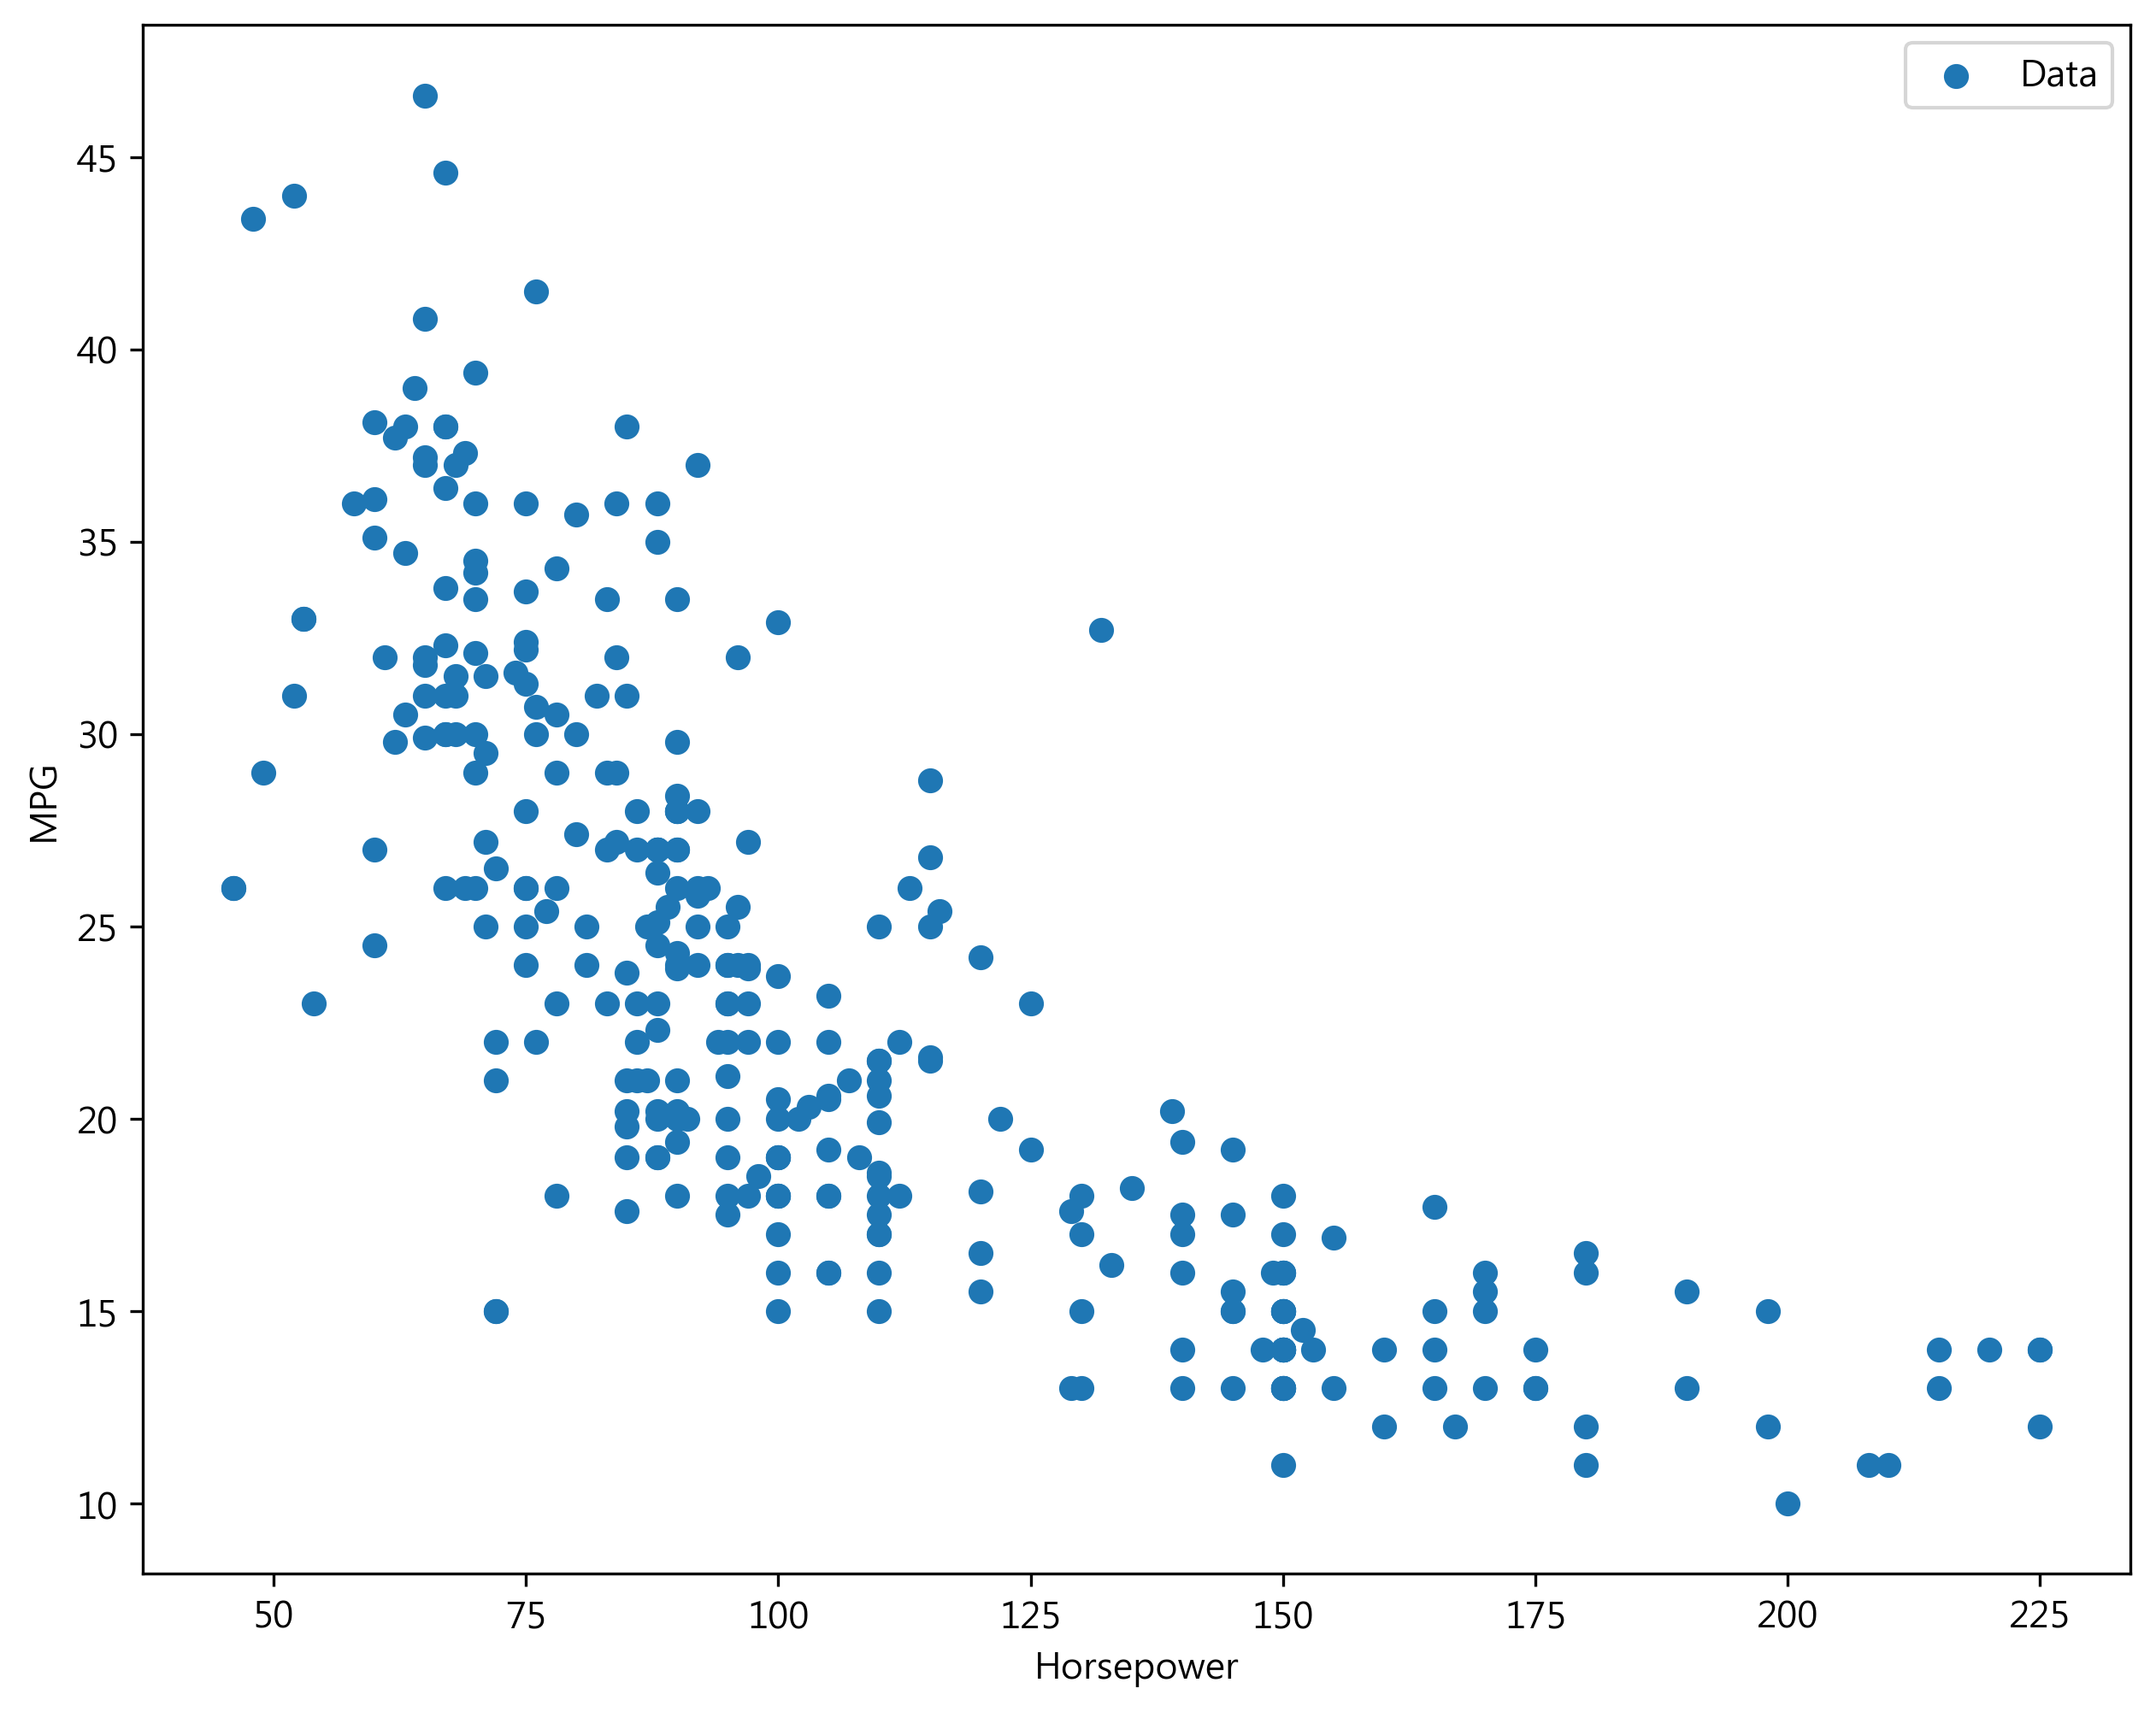

In [70]:
plot('Horsepower')

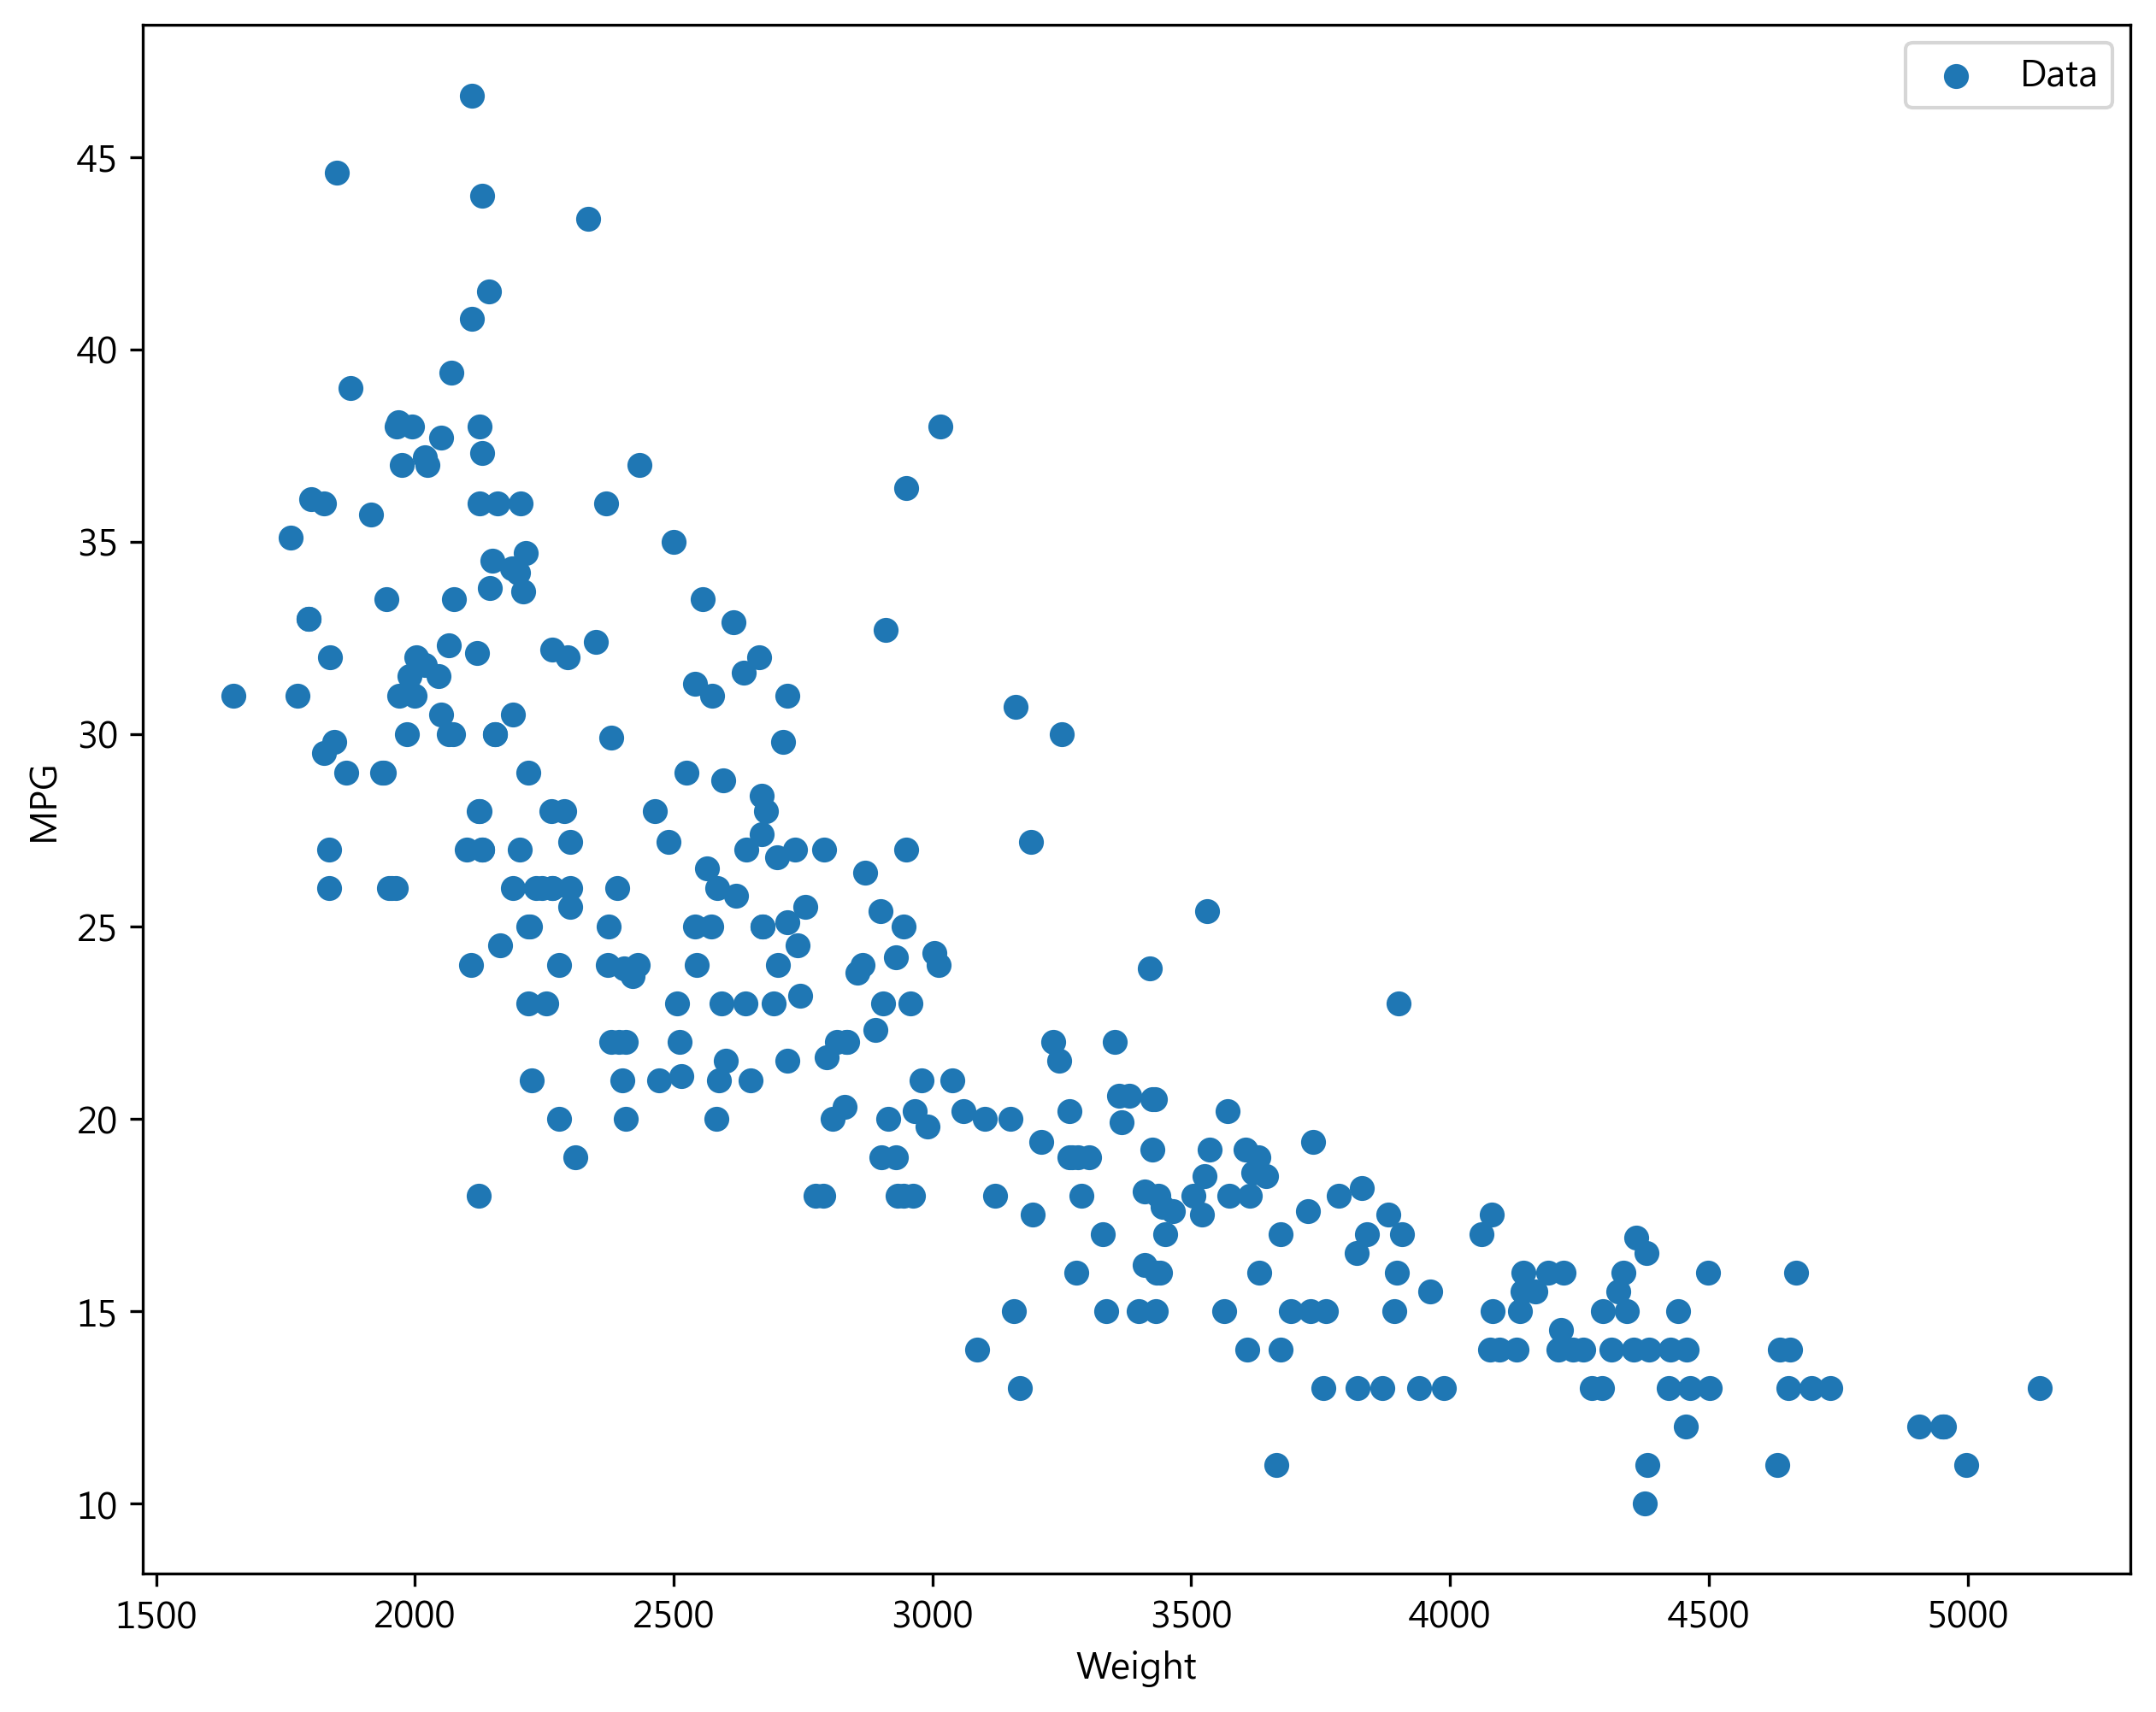

In [71]:
plot('Weight')

In [28]:
print(train_dataset.describe().transpose()[['mean','std']])

                     mean         std
MPG             23.310510    7.728652
Cylinders        5.477707    1.699788
Displacement   195.318471  104.331589
Horsepower     104.869427   38.096214
Weight        2990.251592  843.898596
Acceleration    15.559236    2.789230
Model Year      75.898089    3.675642
USA              0.624204    0.485101
Europe           0.178344    0.383413
Japan            0.197452    0.398712


In [29]:
normalizer=preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[5.47770691e+00 1.95318497e+02 1.04869446e+02 2.99025171e+03
  1.55592356e+01 7.58980942e+01 6.24203861e-01 1.78343967e-01
  1.97452217e-01]]


上面的数据和上上面的数据是一样的

In [30]:
first = np.array(train_features[:1])
print('First example:',first)
print('Normalized:',normalizer(first).numpy())

First example: [[4.000e+00 9.000e+01 7.500e+01 2.125e+03 1.450e+01 7.400e+01 1.000e+00
  0.000e+00 0.000e+00]]
Normalized: [[-0.8707355  -1.0110706  -0.7853045  -1.0269395  -0.3803653  -0.51722217
   0.77591276 -0.4658909  -0.49601588]]


In [41]:
feature='Horsepower'
single_feature = np.array(train_features[feature])
print(single_feature.shape,train_features.shape)

(314,) (314, 9)


In [45]:
single_feature_normalizer =tf.keras.layers.Normalization(input_shape=[1,], axis=None)
single_feature_normalizer.adapt(single_feature)

In [46]:
single_feature_model = keras.models.Sequential([
    single_feature_normalizer,
    layers.Dense(units=1)
])

In [47]:
single_feature_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_10 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [48]:
loss=keras.losses.MeanAbsoluteError()
optim = keras.optimizers.Adam(lr=0.1)
single_feature_model.compile(optimizer=optim,loss=loss)

C:\Users\zzy\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [49]:
history = single_feature_model.fit(
    train_features[feature],
    train_labels,
    epochs=100,
    verbose=1,
    validation_split=0.2
)


Epoch 1/100
8/8 [==============================] - 0s 17ms/step - loss: 22.8662 - val_loss: 22.9329
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 22.0635 - val_loss: 22.1328
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 21.2642 - val_loss: 21.3330
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 20.4620 - val_loss: 20.5331
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 19.6624 - val_loss: 19.7330
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 18.8624 - val_loss: 18.9331
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 18.0630 - val_loss: 18.1332
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 17.2652 - val_loss: 17.3329
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 16.4625 - val_loss: 16.5330
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 15.6651 - val_loss: 15.7328
Epoch 11

8/8 [==============================] - 0s 3ms/step - loss: 3.8036 - val_loss: 4.1774
Epoch 85/100
8/8 [==============================] - 0s 4ms/step - loss: 3.8048 - val_loss: 4.1746
Epoch 86/100
8/8 [==============================] - 0s 4ms/step - loss: 3.8075 - val_loss: 4.2137
Epoch 87/100
8/8 [==============================] - 0s 4ms/step - loss: 3.8056 - val_loss: 4.2058
Epoch 88/100
8/8 [==============================] - 0s 4ms/step - loss: 3.8000 - val_loss: 4.1654
Epoch 89/100
8/8 [==============================] - 0s 4ms/step - loss: 3.8065 - val_loss: 4.1391
Epoch 90/100
8/8 [==============================] - 0s 4ms/step - loss: 3.8116 - val_loss: 4.1234
Epoch 91/100
8/8 [==============================] - 0s 4ms/step - loss: 3.8134 - val_loss: 4.1768
Epoch 92/100
8/8 [==============================] - 0s 4ms/step - loss: 3.8085 - val_loss: 4.2042
Epoch 93/100
8/8 [==============================] - 0s 4ms/step - loss: 3.8030 - val_loss: 4.1795
Epoch 94/100
8/8 [===============

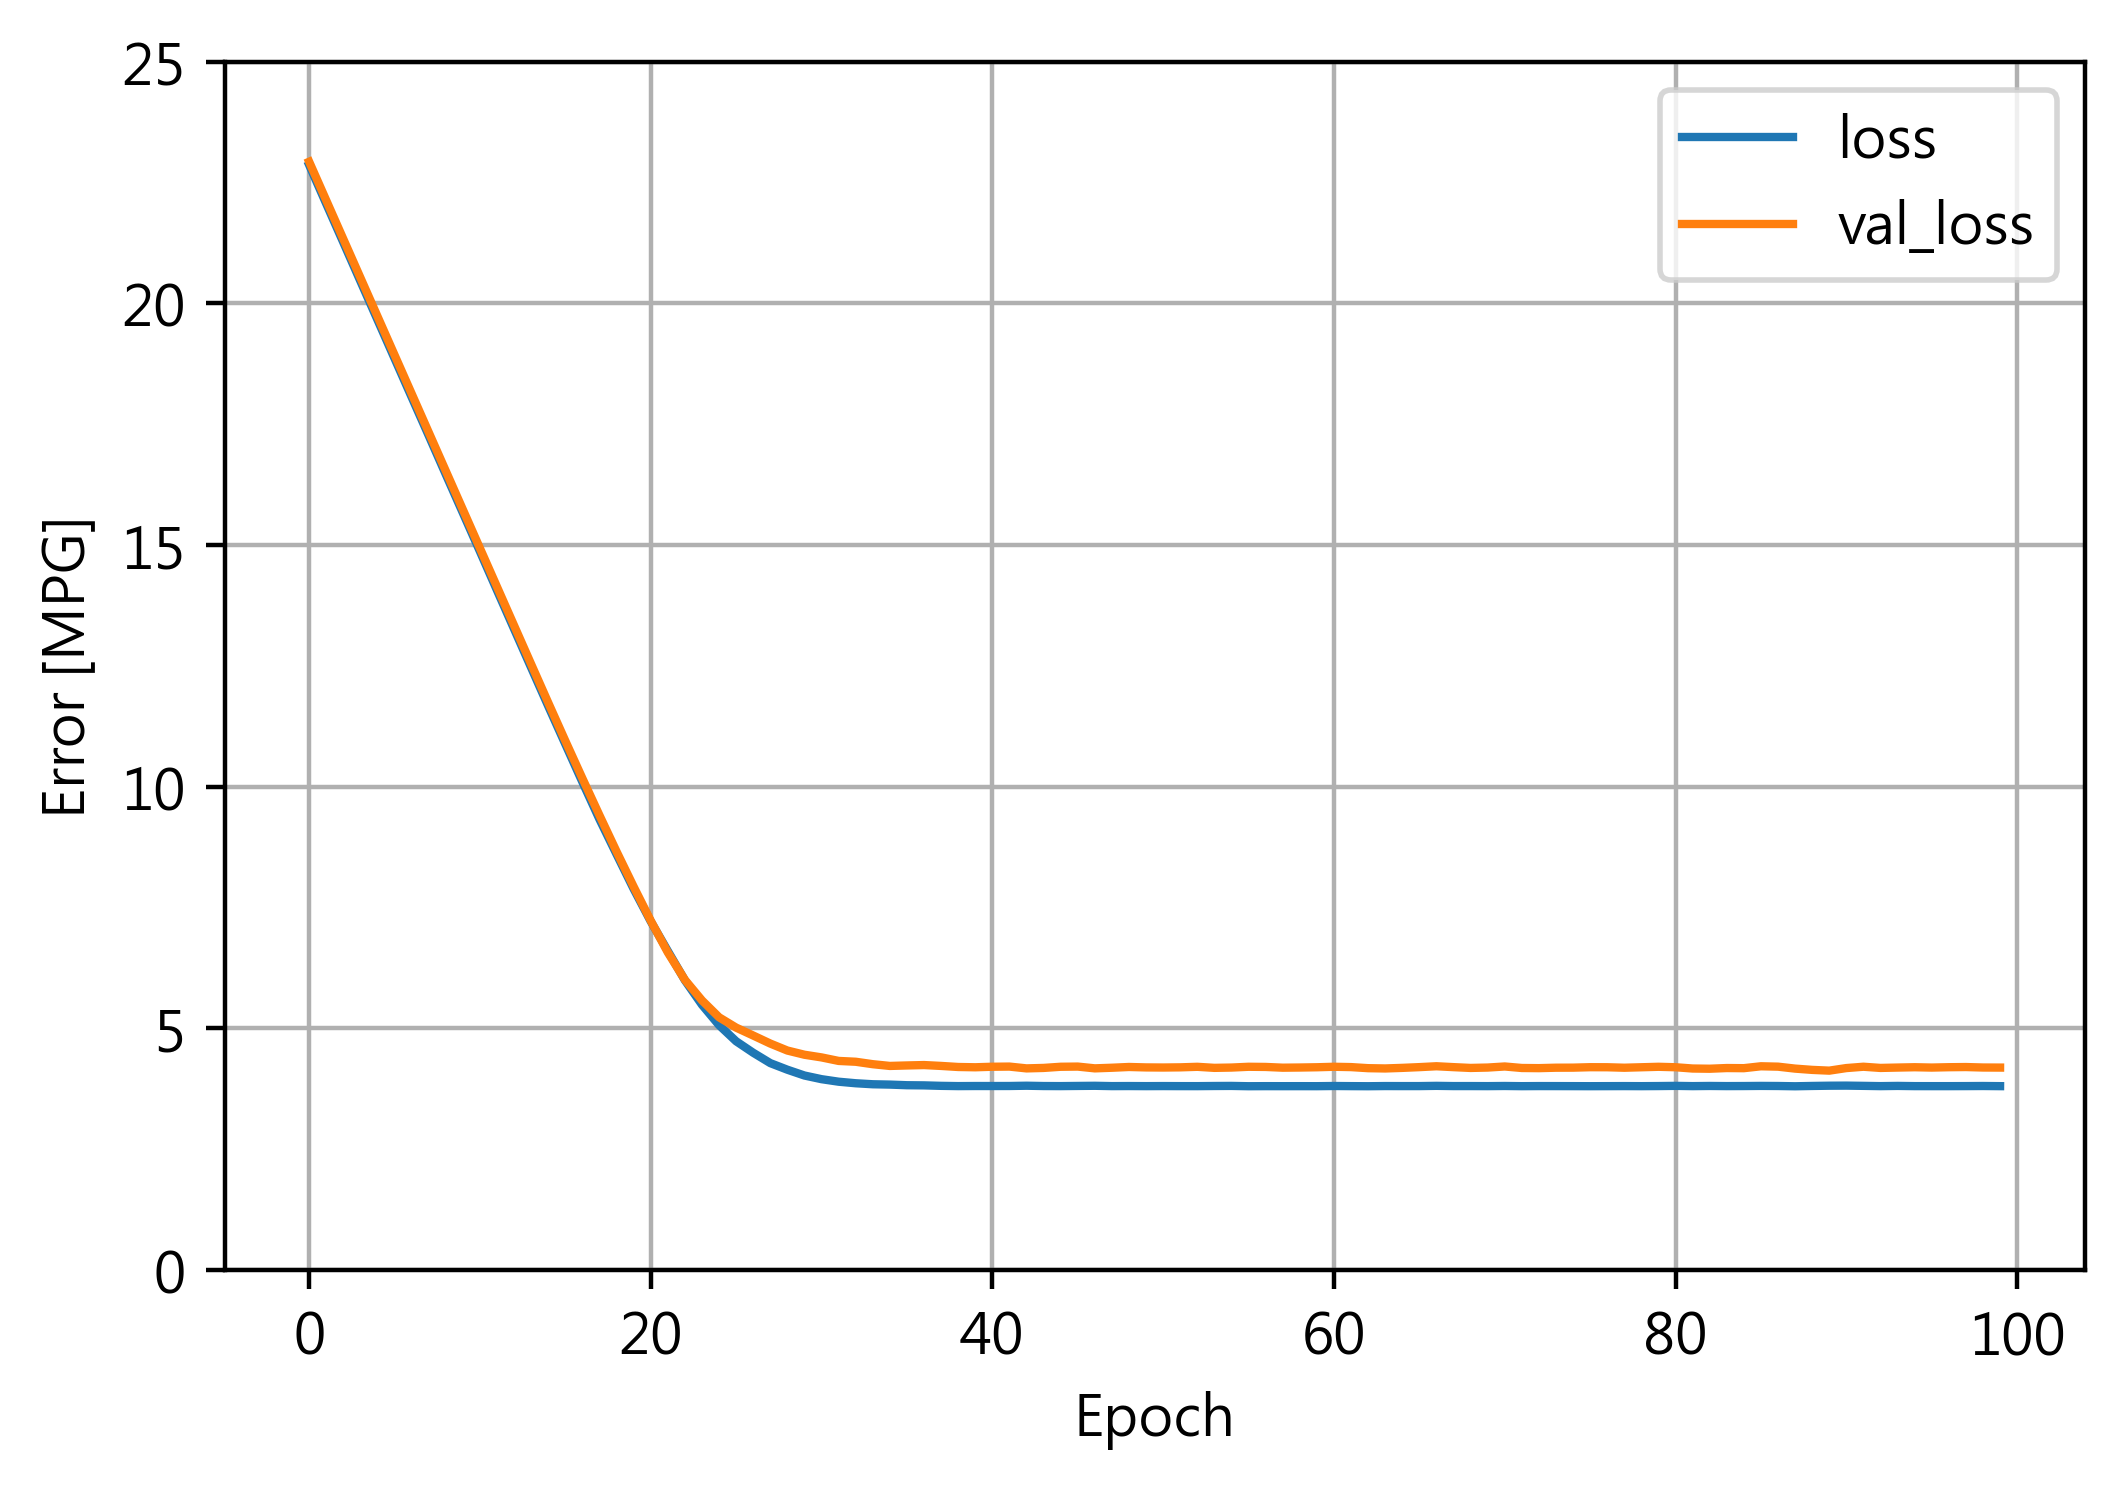

In [52]:
def plot_loss(history):
    plt.figure(dpi=400)
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.ylim([0,25])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [54]:
single_feature_model.evaluate(
    test_features[feature],
    test_labels,
    verbose=1
)

3/3 [==============================] - 0s 2ms/step - loss: 3.6422


3.642186164855957

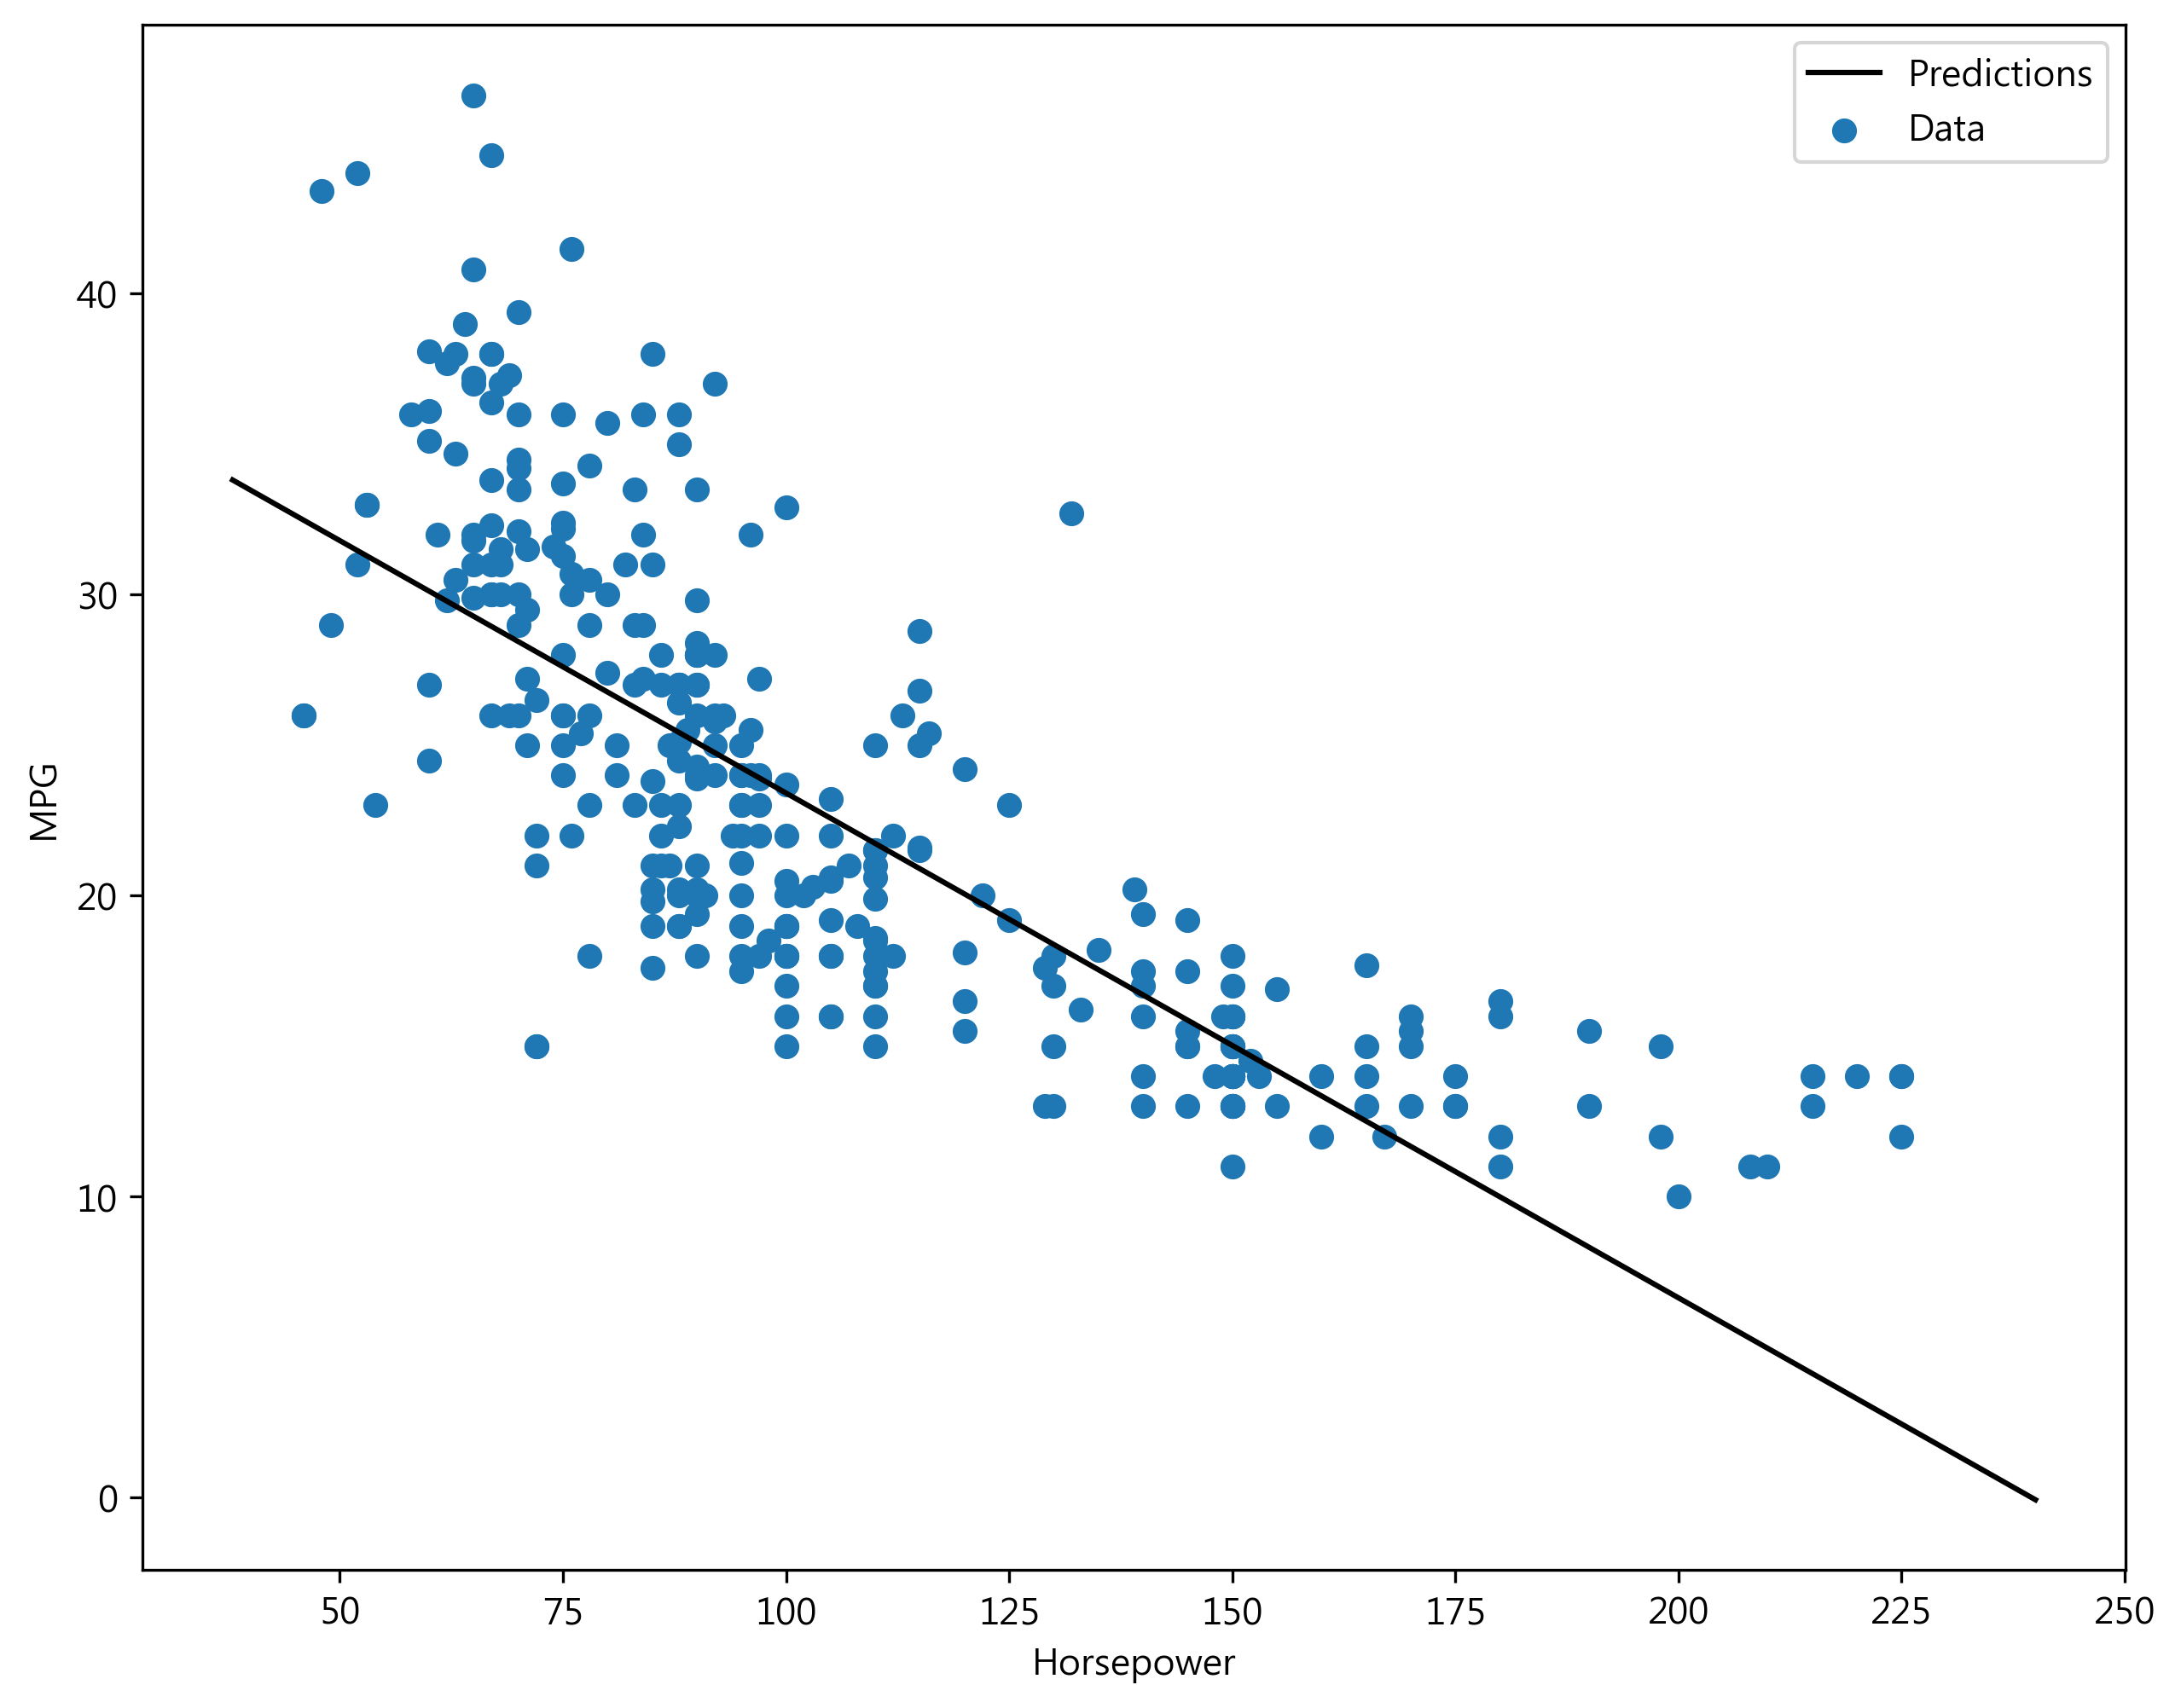

In [72]:
range_min = np.min(test_features[feature])-10
range_max = np.max(test_features[feature])+10
x= tf.linspace(range_min,range_max,200)
y=single_feature_model.predict(x)
plot(feature,x,y)


# 神经网络

In [73]:
dnn_model = keras.Sequential([
    single_feature_normalizer,
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(1)
])

In [74]:
dnn_model.compile(loss=loss,optimizer=tf.keras.optimizers.Adam(0.001))
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_10 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [75]:
dnn_model.fit(
    train_features[feature],
    train_labels,
    validation_split=0.2,
    verbose=1,
    epochs=100
)

Epoch 1/100
8/8 [==============================] - 0s 14ms/step - loss: 22.9727 - val_loss: 23.3219
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 22.7097 - val_loss: 23.0352
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 22.4210 - val_loss: 22.6941
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 22.0609 - val_loss: 22.2700
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 21.6159 - val_loss: 21.7272
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 21.0282 - val_loss: 21.0038
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 20.2518 - val_loss: 20.0713
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 19.2769 - val_loss: 18.9924
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 18.2007 - val_loss: 17.8350
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 17.0721 - val_loss: 16.7093
Epoch 11

8/8 [==============================] - 0s 4ms/step - loss: 3.2660 - val_loss: 3.7705
Epoch 85/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2662 - val_loss: 3.7806
Epoch 86/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2651 - val_loss: 3.7661
Epoch 87/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2613 - val_loss: 3.7666
Epoch 88/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2621 - val_loss: 3.7758
Epoch 89/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2647 - val_loss: 3.7634
Epoch 90/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2627 - val_loss: 3.7714
Epoch 91/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2564 - val_loss: 3.7753
Epoch 92/100
8/8 [==============================] - 0s 4ms/step - loss: 3.2647 - val_loss: 3.7552
Epoch 93/100
8/8 [==============================] - 0s 5ms/step - loss: 3.2547 - val_loss: 3.7614
Epoch 94/100
8/8 [===============

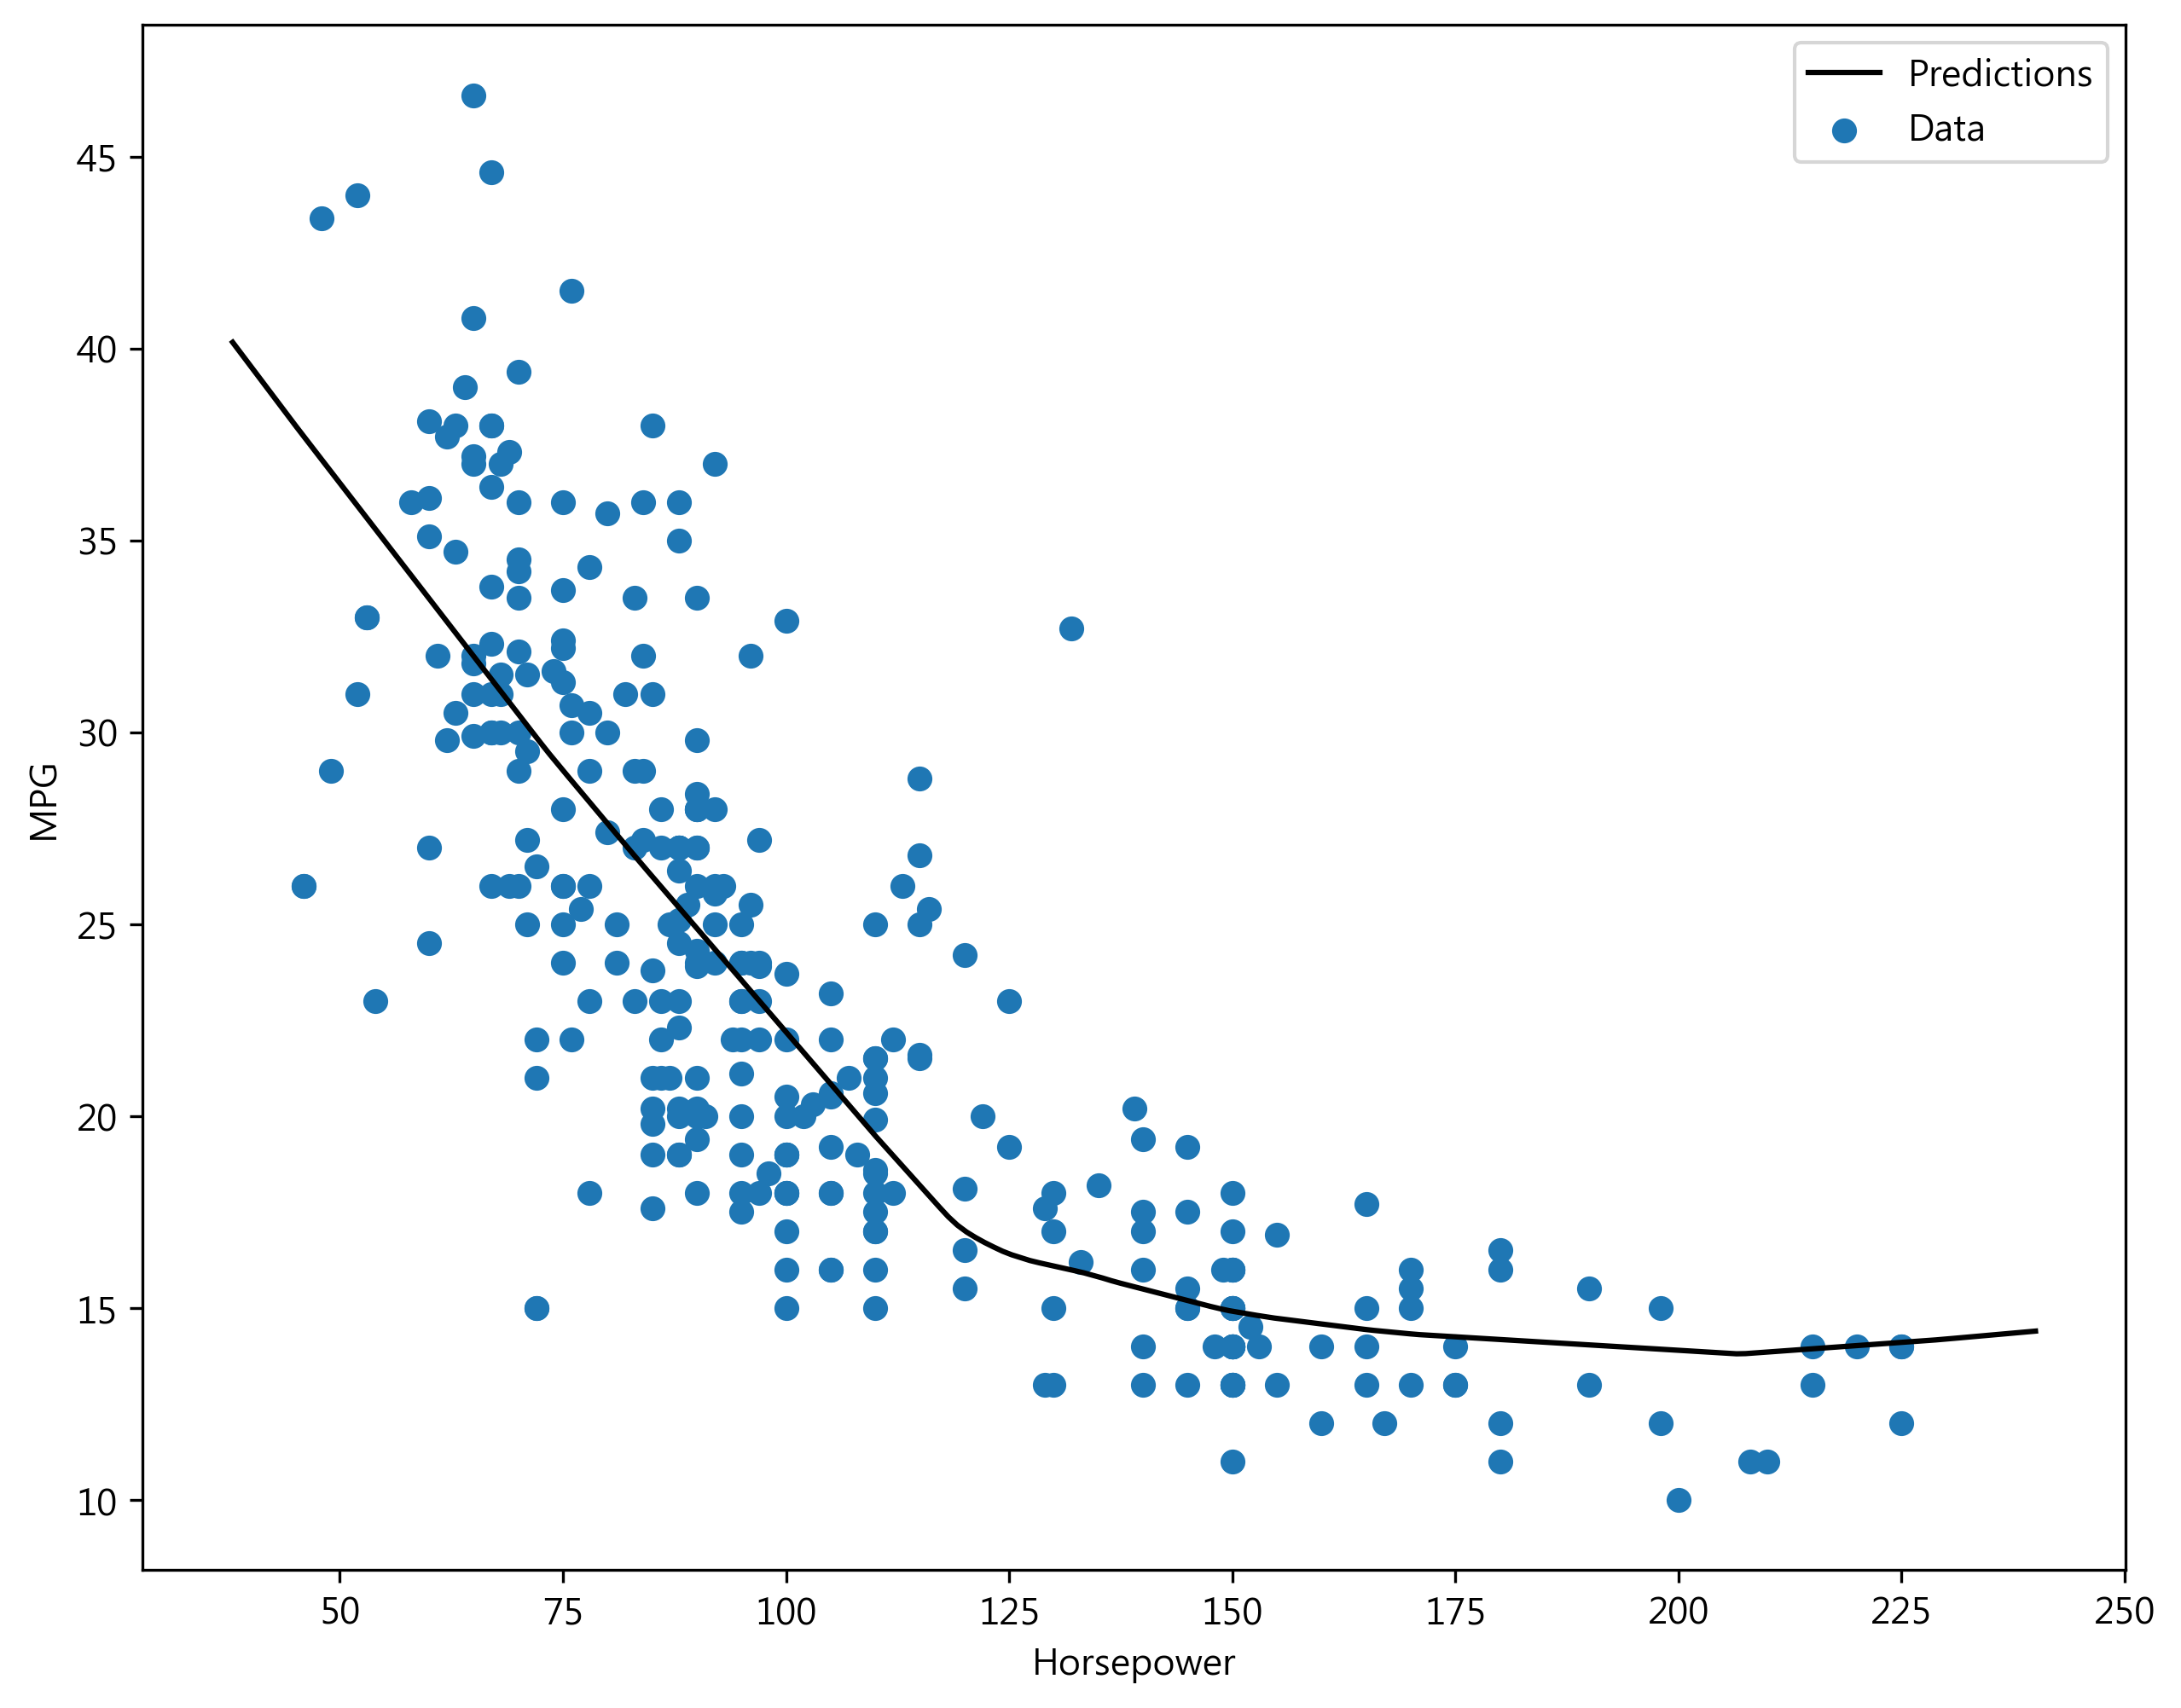

In [77]:
x=tf.linspace(range_min,range_max,200)
y=dnn_model.predict(x)
plot(feature,x,y)

用所有的特征来判断。准确度更高

In [79]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=loss
)

In [80]:
linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=1,
    validation_split=0.2
)

Epoch 1/100
8/8 [==============================] - 0s 13ms/step - loss: 22.8927 - val_loss: 23.0860
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 22.0319 - val_loss: 22.3820
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 21.2004 - val_loss: 21.6709
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 20.3905 - val_loss: 20.9517
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 19.5658 - val_loss: 20.2102
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 18.7917 - val_loss: 19.5429
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 17.9106 - val_loss: 18.7943
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 17.0943 - val_loss: 18.0750
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 16.2795 - val_loss: 17.3821
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 15.4547 - val_loss: 16.6496
Epoch 11

8/8 [==============================] - 0s 4ms/step - loss: 2.4880 - val_loss: 2.4696
Epoch 85/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4713 - val_loss: 2.5005
Epoch 86/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4996 - val_loss: 2.4700
Epoch 87/100
8/8 [==============================] - 0s 4ms/step - loss: 2.5042 - val_loss: 2.4851
Epoch 88/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4763 - val_loss: 2.4717
Epoch 89/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4727 - val_loss: 2.4536
Epoch 90/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4744 - val_loss: 2.4939
Epoch 91/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4863 - val_loss: 2.4772
Epoch 92/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4731 - val_loss: 2.4931
Epoch 93/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4761 - val_loss: 2.4571
Epoch 94/100
8/8 [===============

全特征数据集的训练比神经网络和线性回归的损失都更低。